In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model  import LinearRegression

### Loading the raw data 

In [2]:
raw_data= pd.read_csv('cars_data.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


### Data Processing 

In [3]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


1.count -  we can see that there are many missing values in each column<br>
2.unique- number of unique values in each column. There are 312 unique values in models <br>
3.top - higest occurance value in that column<br>
4.freq - frequency of that top value 

We will remove Model variable because it has 312 unique values.For now it is not that important.

### Determining the variable of interest

In [4]:
new_data= raw_data.copy()
#axis=0:rows, axis=1: columns
data=new_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
#dropping the rows having missing values 

final_data=data.dropna(axis=0)
final_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

count     4025.00
mean     19552.31
std      25815.73
min        600.00
25%       6999.00
50%      11500.00
75%      21900.00
max     300000.00
Name: Price, dtype: float64

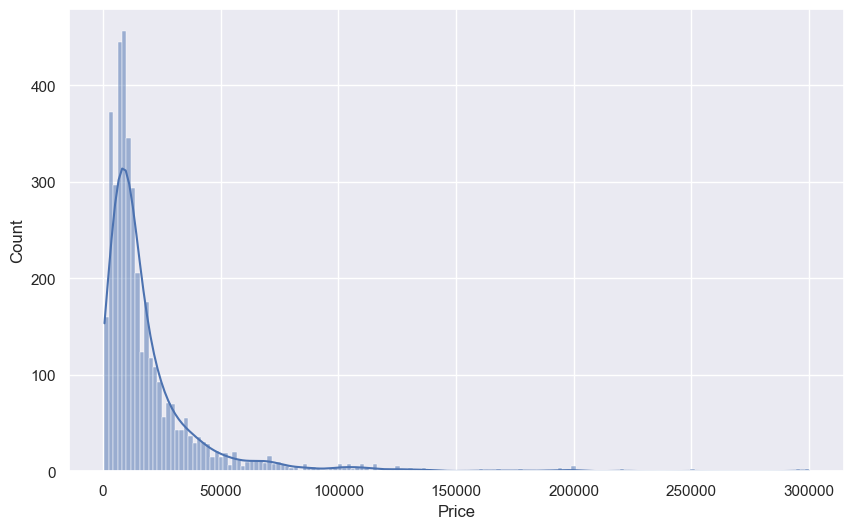

In [65]:
#sns.distplot(final_data['Price'])
plt.figure(figsize=(10, 6))
sns.histplot(final_data["Price"], kde=True)
final_data['Price'].describe()

The provided statistics offer a summary of the 'Price' column from your dataset. Here's a detailed interpretation of each statistic:<br>

Count (4025):<br>

The dataset contains 4025 observations for the 'Price' variable.
Mean (19552.31):<br>

The <b>average price</b> is approximately 19,552.31. This suggests that, on average, the prices are around this value.
Standard Deviation (std) (25815.73):<br>

The <b>standard deviation</b> is 25,815.73, indicating a high level of dispersion or variability in the prices. This means that the prices vary significantly from the mean.<br>
Minimum (min) (600.00):<br>

The <b>lowest price</b> in the dataset is 600. This represents the least expensive item recorded.
25th Percentile (25%) (6999.00):<br>

<b>25%</b> of the prices are below 6,999. This is also known as the first quartile (Q1), indicating that a quarter of the data falls below this value.<br><br>
<b>Median</b> (50%) (11500.00):<br>

The median price is 11,500. This means that 50% of the prices are below this value and 50% are above. The median provides a better central tendency measure when the data is skewed, as it is less affected by extreme values compared to the mean.
75th Percentile (75%) (21900.00):<br>

75% of the prices are below 21,900. This is also known as the third quartile (Q3), indicating that three-quarters of the data falls below this value.<br><br>
Maximum (max) (300000.00):<br>

The highest price in the dataset is <b>300,000</b>. This represents the most expensive item recorded.<br>
Commentary:<br>
<b>Skewness and Outliers:</b> The mean is significantly higher than the median, suggesting a positive skew in the distribution of prices. This indicates that there are some high-price outliers pulling the mean upwards. The maximum price (300,000) is much higher than the third quartile (21,900), <b><font color=red>confirming the presence of these outliers</font></b>.<br>
<b>Variability:</b> The high standard deviation (25,815.73) further confirms the presence of wide variability in the prices. The range between the minimum (600) and maximum (300,000) prices also underscores this variability.<br>
<b>Quartiles: </b>The spread between the 25th percentile (6,999) and the 75th percentile (21,900) suggests that the middle 50% of the data (interquartile range) is between these values, highlighting a considerable spread within this range as well.<br>
Overall, the dataset exhibits a wide range of prices with significant variability and a skew towards higher prices due to some high-value outliers.<br>

### Dealing with outliers

In [8]:
q=final_data['Price'].quantile(0.99)
data_1=final_data[final_data['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


count     3984.00
mean     17837.12
std      18976.27
min        600.00
25%       6980.00
50%      11400.00
75%      21000.00
max     129222.00
Name: Price, dtype: float64

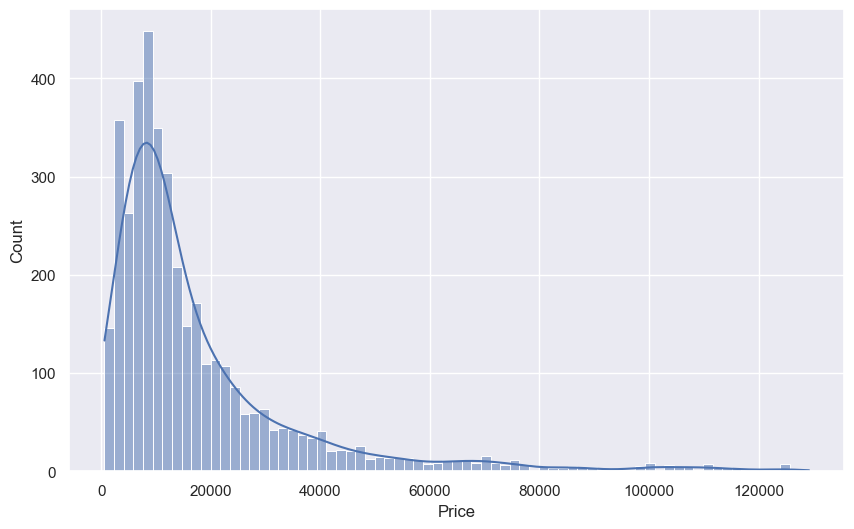

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(data_1["Price"], kde=True)
data_1['Price'].describe()

count   4025.00
mean     163.57
std      103.39
min        0.00
25%       90.00
50%      158.00
75%      230.00
max      980.00
Name: Mileage, dtype: float64

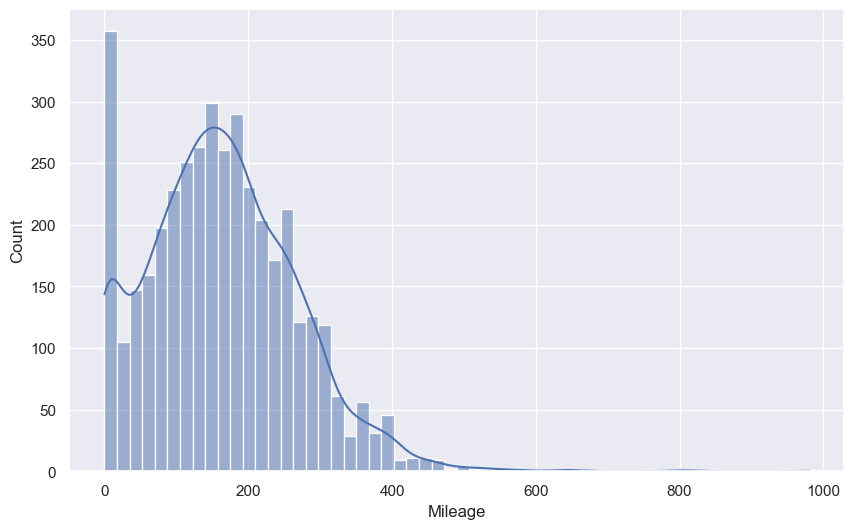

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(final_data["Mileage"], kde=True)
final_data['Mileage'].describe()

In [73]:
q=data_1['Mileage'].quantile(0.99)
data_2=data_1[data_1['Mileage']<q]
data_2['Mileage'].describe()

count   3944.00
mean     161.48
std       96.03
min        0.00
25%       92.00
50%      158.00
75%      230.00
max      435.00
Name: Mileage, dtype: float64

<Axes: xlabel='Mileage', ylabel='Count'>

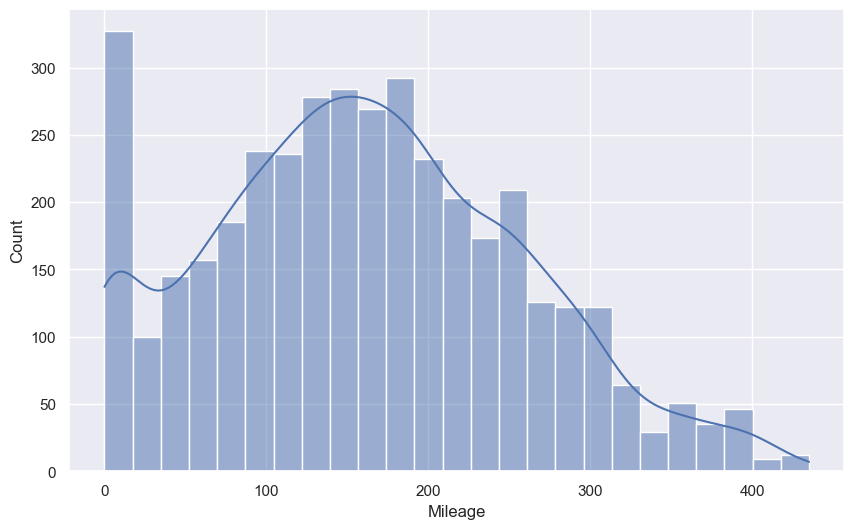

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(data_2["Mileage"], kde=True)

count   3944.00
mean       2.75
std        4.98
min        0.60
25%        1.80
50%        2.20
75%        3.00
max       99.99
Name: EngineV, dtype: float64

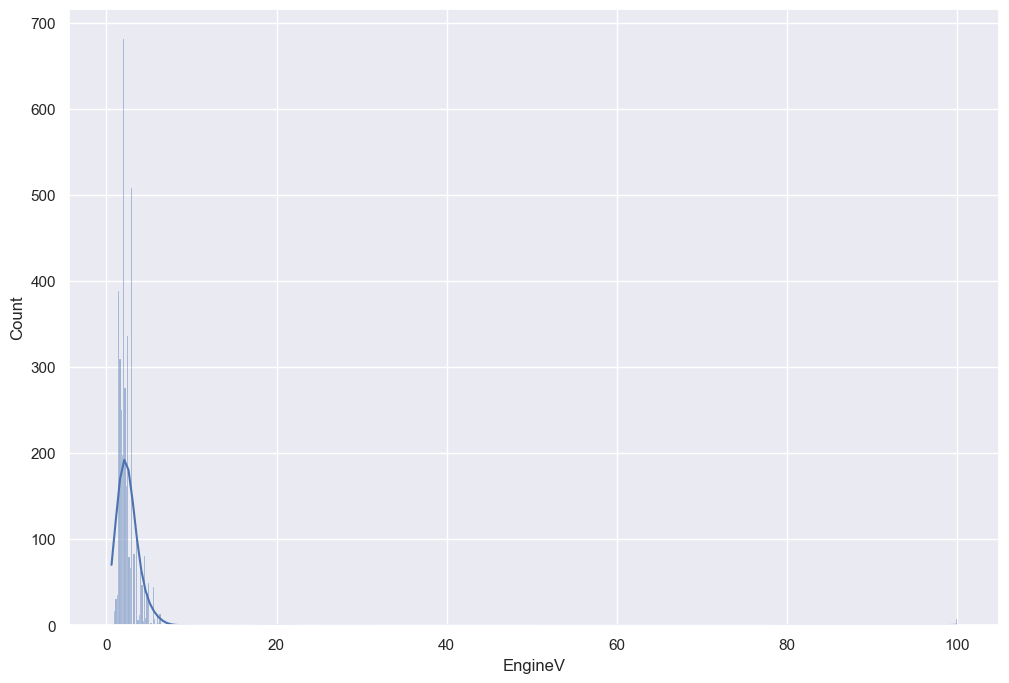

In [84]:
plt.figure(figsize=(12, 8))
sns.histplot(data_2["EngineV"], kde=True)
data_2['EngineV'].describe()

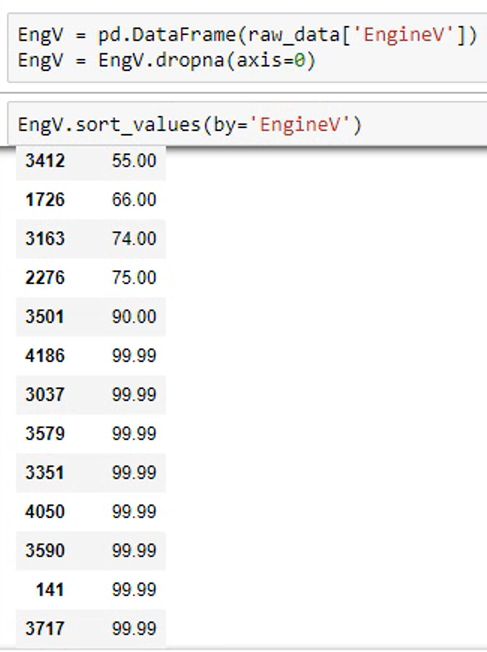


An interval where engine volume should normally fall is 0.6 to 6.5

In [85]:
data_3=data_2[data_2['EngineV']<6.5]
data_3['EngineV'].describe()

count   3921.00
mean       2.44
std        0.95
min        0.60
25%        1.80
50%        2.20
75%        3.00
max        6.30
Name: EngineV, dtype: float64

count   3921.00
mean       2.44
std        0.95
min        0.60
25%        1.80
50%        2.20
75%        3.00
max        6.30
Name: EngineV, dtype: float64

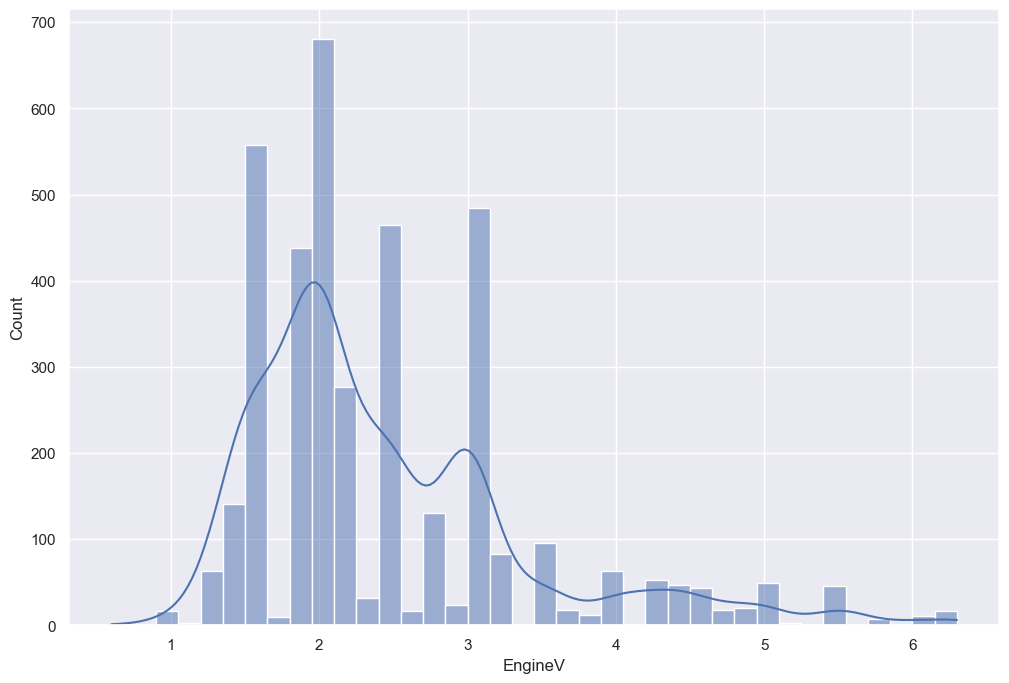

In [86]:
plt.figure(figsize=(12, 8))
sns.histplot(data_3["EngineV"], kde=True)
data_3['EngineV'].describe()

count   3921.00
mean    2006.41
std        6.60
min     1969.00
25%     2003.00
50%     2008.00
75%     2012.00
max     2016.00
Name: Year, dtype: float64

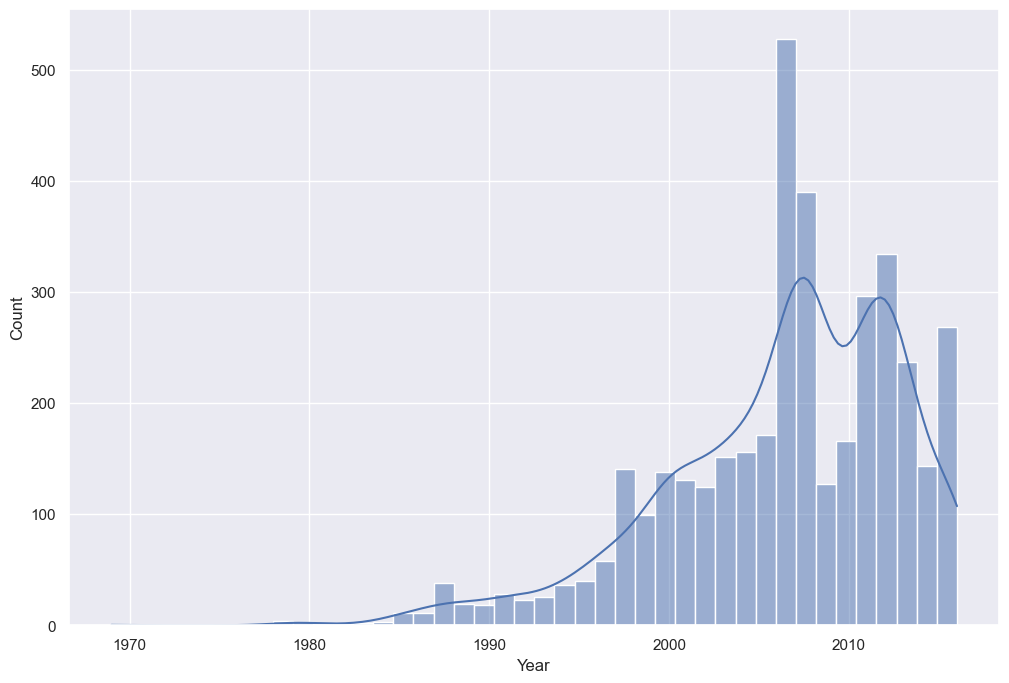

In [87]:
plt.figure(figsize=(12, 8))
sns.histplot(data_3["Year"], kde=True)
data_3['Year'].describe()

In [89]:
q=data_3['Year'].quantile(0.01)
data_4=data_3[data_3['Year']>q]
data_4['Year'].describe()

count   3867.00
mean    2006.71
std        6.10
min     1988.00
25%     2003.00
50%     2008.00
75%     2012.00
max     2016.00
Name: Year, dtype: float64

<Axes: xlabel='Year', ylabel='Count'>

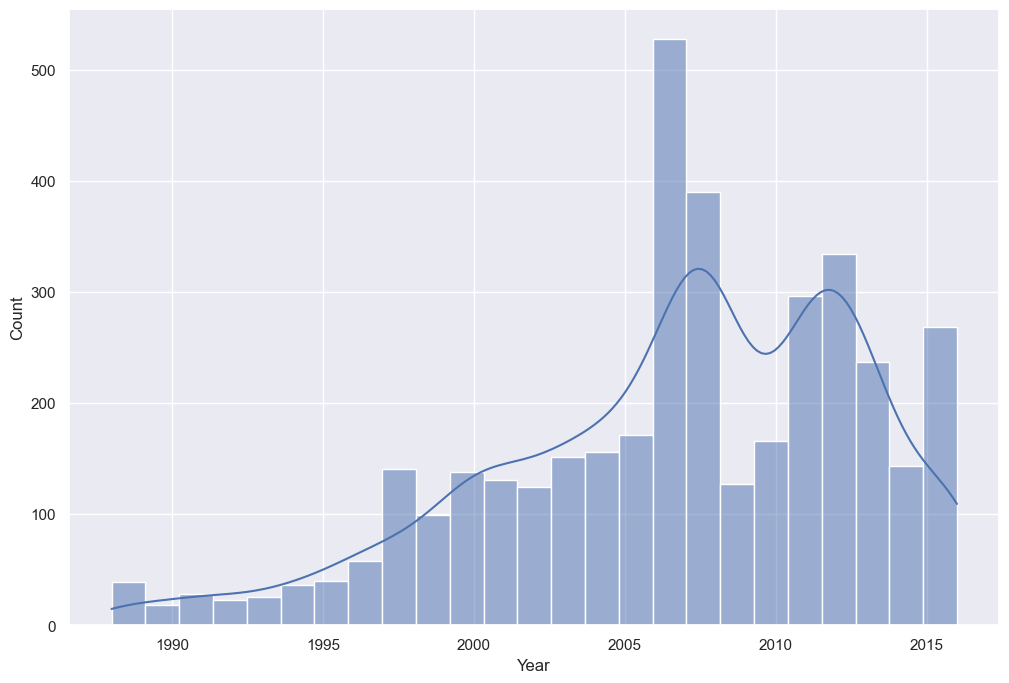

In [90]:
plt.figure(figsize=(12, 8))
sns.histplot(data_4["Year"], kde=True)

In [91]:
data_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


In [92]:
data_cleaned=data_4.reset_index(drop=True)

In [93]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.00,3867,3867.00,3867.00,3867,3867,3867.00
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.46,NaN,160.54,2.45,NaN,NaN,2006.71
std,NaN,19085.86,NaN,95.63,0.95,NaN,NaN,6.10
min,NaN,800.00,NaN,0.00,0.60,NaN,NaN,1988.00
25%,NaN,7200.00,NaN,91.00,1.80,NaN,NaN,2003.00
50%,NaN,11700.00,NaN,157.00,2.20,NaN,NaN,2008.00
75%,NaN,21700.00,NaN,225.00,3.00,NaN,NaN,2012.00


In [94]:
data_cleaned.describe()

,Price,Mileage,EngineV,Year
count,3867.00,3867.00,3867.00,3867.00
mean,18194.46,160.54,2.45,2006.71
std,19085.86,95.63,0.95,6.10
min,800.00,0.00,0.60,1988.00
25%,7200.00,91.00,1.80,2003.00
50%,11700.00,157.00,2.20,2008.00
75%,21700.00,225.00,3.00,2012.00
max,129222.00,435.00,6.30,2016.00


# Checking OLS assumptions 

## 1. Linearity 

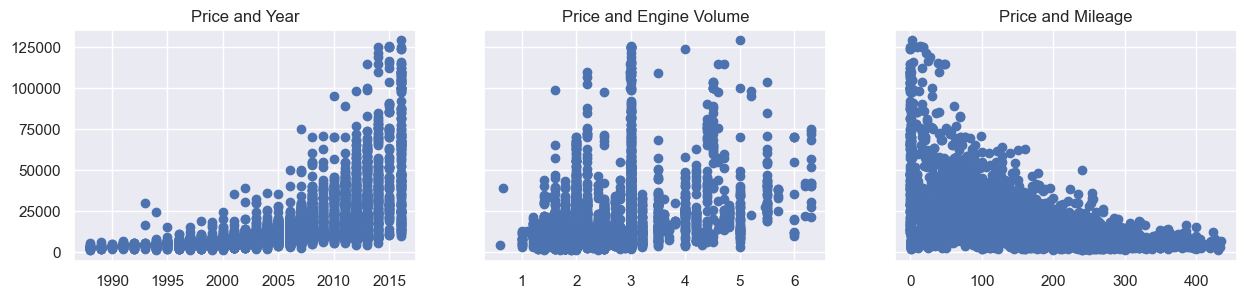

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and Engine Volume')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

As we can see the data is not linear so we will transform it 

<Axes: xlabel='Price', ylabel='Count'>

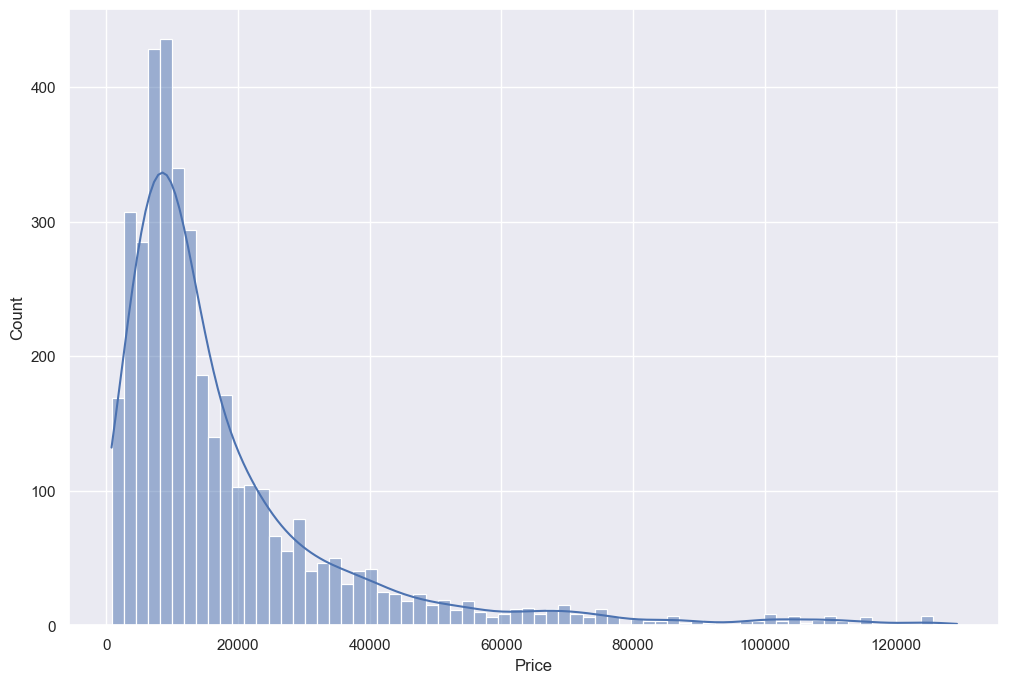

In [95]:
plt.figure(figsize=(12, 8))
sns.histplot(data_4["Price"], kde=True)

as we can see the the price is not normally distributed therefore its relation with other variable is also not linear.So we will tranform that using log transformation.

In [98]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['log_price']=log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.00,sedan,277,2.00,Petrol,yes,1991,8.34
1,Mercedes-Benz,7900.00,van,427,2.90,Diesel,yes,1999,8.97
2,Mercedes-Benz,13300.00,sedan,358,5.00,Gas,yes,2003,9.50
3,Audi,23000.00,crossover,240,4.20,Petrol,yes,2007,10.04
4,Toyota,18300.00,crossover,120,2.00,Petrol,yes,2011,9.81
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.00,van,163,2.50,Diesel,yes,2008,9.35
3863,Toyota,17900.00,sedan,35,1.60,Petrol,yes,2014,9.79
3864,Mercedes-Benz,125000.00,sedan,9,3.00,Diesel,yes,2014,11.74
3865,BMW,6500.00,sedan,1,3.50,Petrol,yes,1999,8.78


<Axes: xlabel='log_price', ylabel='Count'>

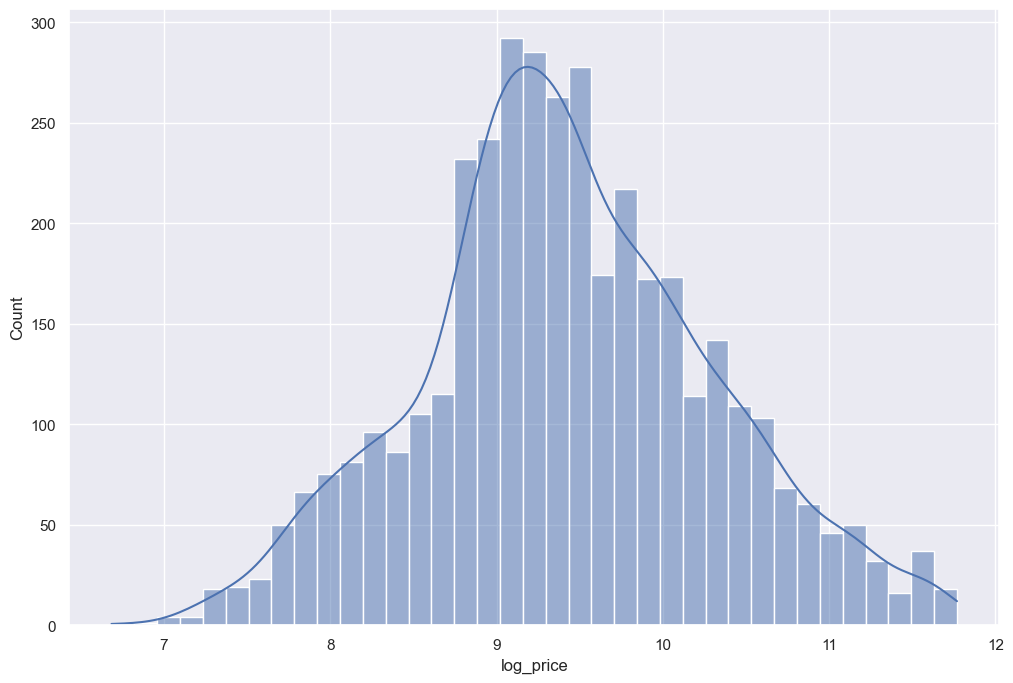

In [99]:
plt.figure(figsize=(12, 8))
sns.histplot(data_cleaned['log_price'], kde=True)

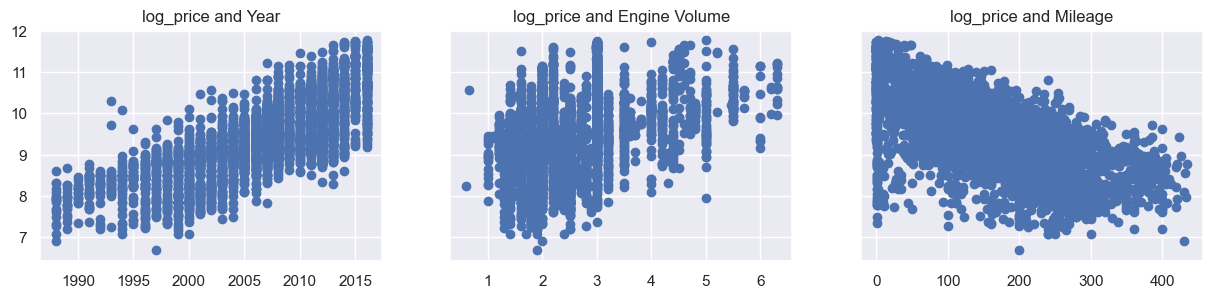

In [25]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('log_price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('log_price and Engine Volume')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('log_price and Mileage')
plt.show()

In [26]:
#instead of price we will take log price 
data_cleaned=data_cleaned.drop(['Price'],axis=1)
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


2. Normality and Homoscedasticity is checked<br>
3. No autocorrelation because the data is not coming from time series data


## Multicollinearity 

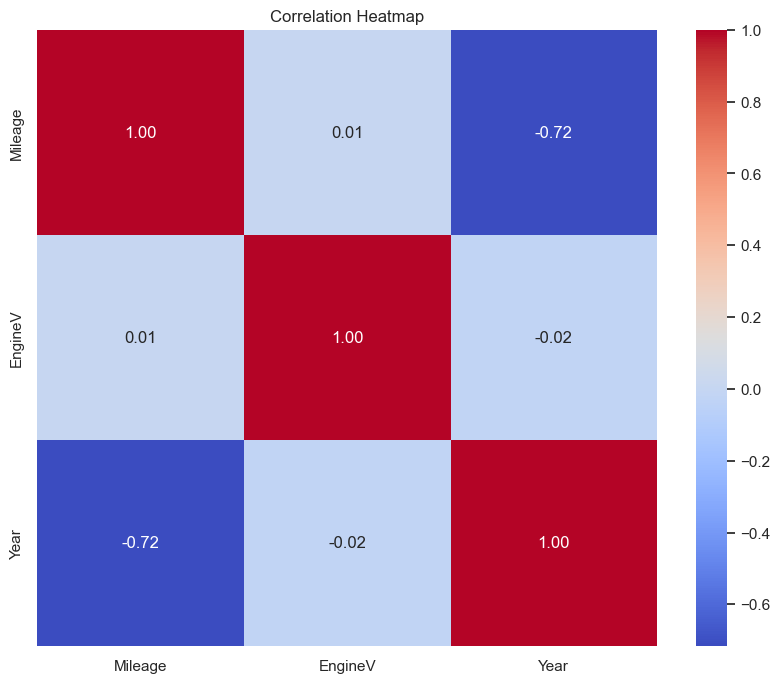

In [27]:
corr_matrix = data_cleaned[['Mileage','EngineV',"Year"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a new dataframe with only the relevant columns
variables = data_cleaned[['Mileage', 'EngineV', 'Year']]

# Calculate the VIF for each variable
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

# Print the VIF results
print(vif)

         VIF Features
0   3.791584  Mileage
1   7.662068  EngineV
2  10.354854     Year


We can drop the variable Year because it has VIF greater then 10.

In [29]:
data_no_Mulitcorr=data_cleaned.drop(['Year'],axis=1)

# Create dummy variables 

In [30]:
data_with_dummies = pd.get_dummies(data_no_Mulitcorr,drop_first=True).astype(float)
#drop_first: If True, drops the first level to avoid multicollinearity.

In [31]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277.0,2.0,8.342840,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,427.0,2.9,8.974618,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,358.0,5.0,9.495519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,240.0,4.2,10.043249,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,120.0,2.0,9.814656,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [32]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(data_with_dummies.values, i) for i in range(data_with_dummies.shape[1])]
vif["Features"] = data_with_dummies.columns

# Print the VIF results
print(vif)

          VIF             Features
0    4.460434              Mileage
1   13.445639              EngineV
2   41.981260            log_price
3    2.603990            Brand_BMW
4    3.084356  Brand_Mercedes-Benz
5    1.830297     Brand_Mitsubishi
6    2.281498        Brand_Renault
7    2.406546         Brand_Toyota
8    3.312814     Brand_Volkswagen
9    1.583516           Body_hatch
10   1.597487           Body_other
11   3.455354           Body_sedan
12   1.810633           Body_vagon
13   2.579105             Body_van
14   1.711589      Engine Type_Gas
15   1.082223    Engine Type_Other
16   2.506715   Engine Type_Petrol
17  15.167906     Registration_yes


In [33]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [34]:
cols=['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed=data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,8.974618,427.0,2.9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,9.495519,358.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,10.043249,240.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,9.814656,120.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [35]:
target=data_preprocessed['log_price']#dependent variable 
inputs=data_preprocessed.drop(['log_price'],axis=1)#independent variables

### Scaling 

In [36]:
from  sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaler.fit(inputs)


StandardScaler()

In [100]:
input_scaled= scaler.transform(inputs)
input_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.16209221,
         1.33267512,  0.32137366],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.16209221,
        -0.75037043,  0.32137366]])

## train test split

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test=train_test_split(input_scaled,target,test_size=0.2,random_state=365)

## Regresssion 

In [40]:
reg= LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
y_hat=reg.predict(x_train)

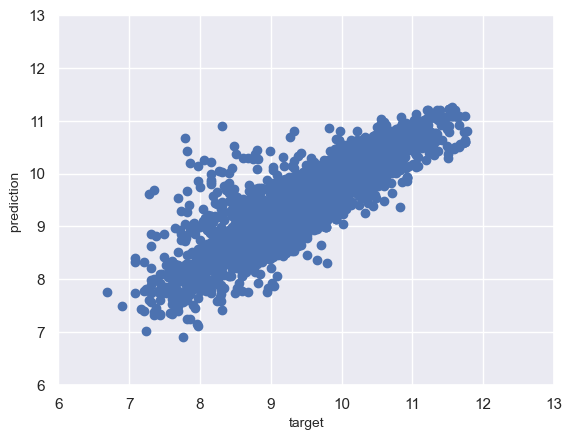

In [42]:
plt.scatter(y_train,y_hat)
plt.plot()
plt.xlabel("target",size=10)
plt.ylabel("prediction ",size=10)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

R squared

Text(0.5, 1.0, 'Residual PDF')

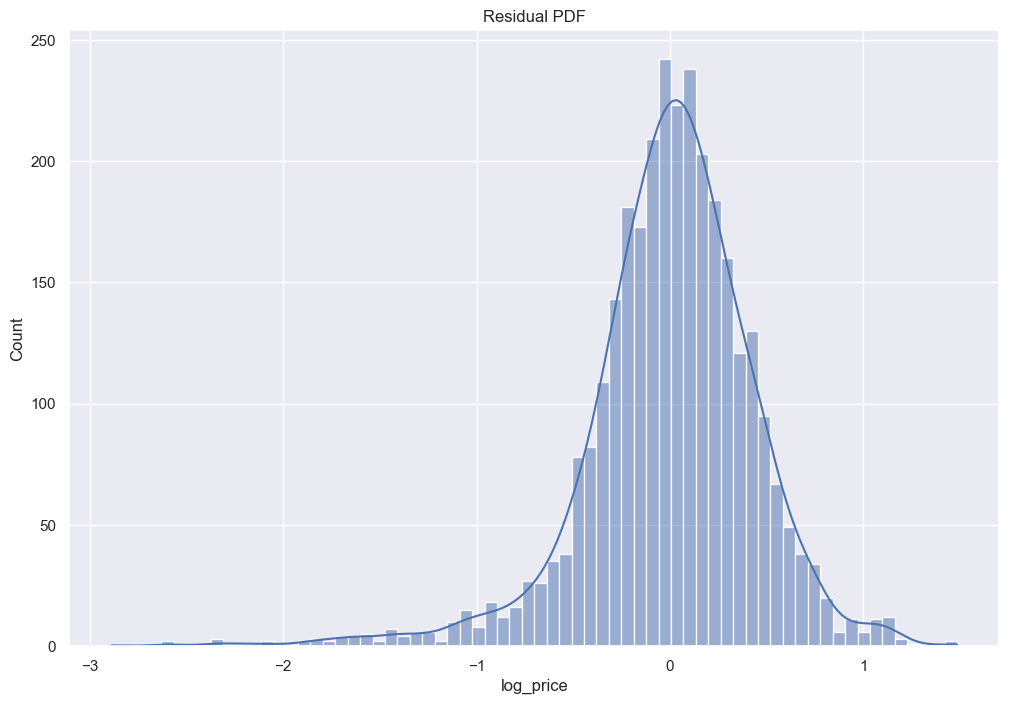

In [102]:

plt.figure(figsize=(12, 8))
sns.histplot(y_train-y_hat, kde=True)
plt.title("Residual PDF")

There are certain observation where (actual - predicted) is much lower then the mean.that means it over estimate the target.And on the right side there are no such observation so we can say that it rarely underestimate the target
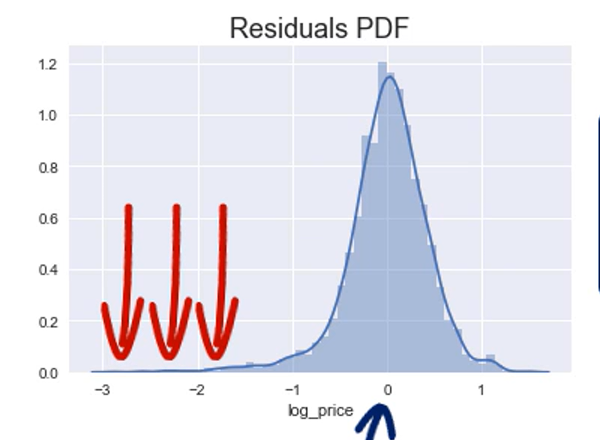

In [44]:
reg.score(x_train,y_train)

0.744996578792662

our model explain 75% of the variabiliy of the data

## finding the weights and bias

In [45]:
reg.intercept_

9.415239458021299

In [46]:
reg_summary =  pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary


,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


## Interpretation 

1. A positive weight shows that as a feature increases in value, so do the log _ price and 'Price' respectively.<br>
eg. the engine volume bigger the engine volume higher the price. 

 2. A negative weight shows that as a feature increases in value, log _ price and 'Price' decrease.
 eg. Mileage of car ,if it increases price decreases.
 
 

In [47]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

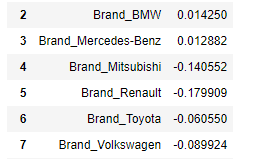 looking at this the audi is dropped one 


### Weights Interpretation

#### I. Continuous Variables:

1. **Positive Weight**: 
   - A positive weight shows that as a feature increases in value, so do the log _ price, and 'Price' respectively.

2. **Negative Weight**: 
   - A negative weight shows that as a feature increases in value, log _ price and 'Price' decrease.

#### II. Dummy Variables:

1. **Positive Weight**: 
   - A positive weight shows that the respective category (Brand) is more expensive than the benchmark (Audi).

2. **Negative Weight**: 
   - A negative weight shows that the respective category (Brand) is less expensive than the benchmark (Audi).


For instance Brand_BMW weight is positive 0.014250.so it means it is more expensive then audi.But it the car is Brand_Mitsubishi	-0.140552 it is less expensive than audi.

## Testing

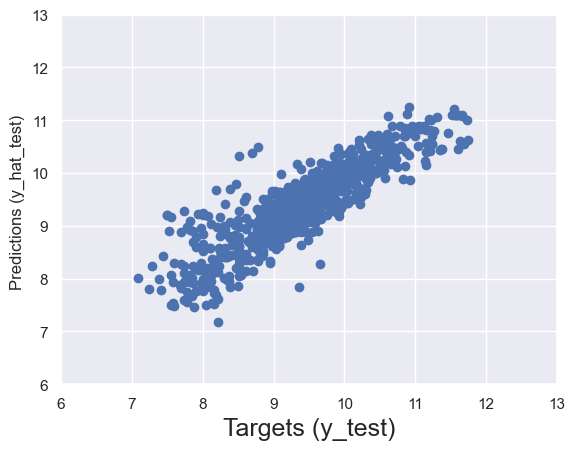

In [48]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_test,y_hat_test)
plt.xlabel( 'Targets (y_test)',size=18)
plt.ylabel( 'Predictions (y_hat_test) ')
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

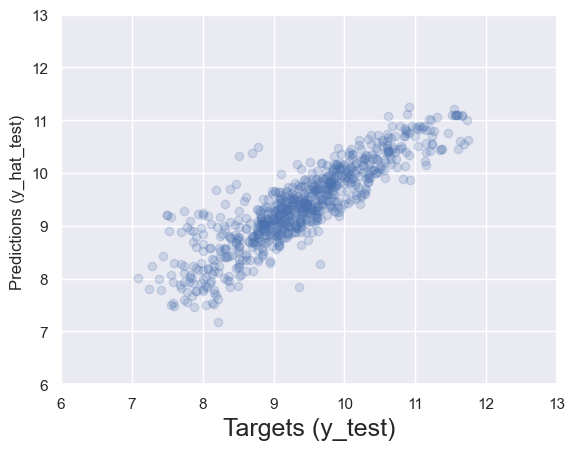

In [49]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_test,y_hat_test,alpha=0.2)
plt.xlabel( 'Targets (y_test)',size=18)
plt.ylabel( 'Predictions (y_hat_test) ')
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [50]:
#converting log_price back to price 
df_performance= pd.DataFrame(np.exp(y_hat_test),columns=['Prediction'])
df_performance

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075
...,...
769,29651.726363
770,10732.071179
771,13922.446953
772,27487.751303


In [51]:
df_performance["Target"]=np.exp(y_test)
df_performance

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


In [52]:
#some of the value is null because the while training and testing it takes the original indices so we have to change the indices 
y_test

1192     7.740664
3360     7.937375
2350     7.824046
3257     8.764053
892      9.121509
          ...    
1935    10.292146
3757     9.169518
3134     9.814656
1369    11.134589
2595     9.287301
Name: log_price, Length: 774, dtype: float64

In [53]:
y_test=y_test.reset_index(drop=True)

In [54]:
df_performance["Target"]=np.exp(y_test)
df_performance

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [55]:
df_performance['Residual']=df_performance['Target']-df_performance['Prediction']
df_performance

,Prediction,Target,Residual
0,10685.501696,2300.0,-8385.501696
1,3499.255242,2800.0,-699.255242
2,7553.285218,2500.0,-5053.285218
3,7463.963017,6400.0,-1063.963017
4,11353.490075,9150.0,-2203.490075
...,...,...,...
769,29651.726363,29500.0,-151.726363
770,10732.071179,9600.0,-1132.071179
771,13922.446953,18300.0,4377.553047
772,27487.751303,68500.0,41012.248697


In [56]:
df_performance['Difference%']=np.absolute(df_performance['Residual']/df_performance['Target']*100)
df_performance

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [57]:
df_performance.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


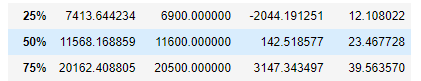
it shows that we are relatively close 

In [58]:
pd.options.display.max_rows= 999
pd.set_option('display.float_format',lambda x:'%.2f'%x)
df_performance.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


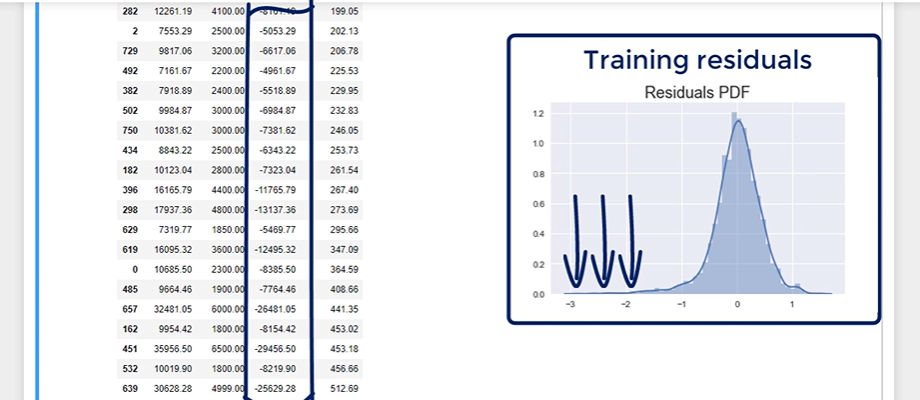
this last samples are not predicting properly and and most of them are negative so there prediction are higer than the targets as shown in the Residual PDF<br>
So to imporve this we can add more variables,transformation or we can remove the bigger outliers.<br>
It can also happen that car is damaged and we dont have info about that.<br>
Here are some other suggestions:<br>

-> Perform feature selection<br>

-> Create a regression where 'Price' is not transformed<br>

-> Deal with the outliers in a different way<br>
